In [ ]:
'''
Test different ML models on the dataset, compare and cross-validate
their accuracy rates with each other, conclude on which models are
the most appropriate for the dataset (70% or higher parameter)
'''

'\nTest different ML models on the dataset, compare and cross-validate\ntheir accuracy rates with each other, conclude on which models are\nthe most appropriate for the dataset (70% or higher parameter)\n'

In [ ]:
# Load the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("Video_games_esrb_rating.csv")

In [ ]:
df

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
count,1895,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,...,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895
unique,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Monster Jam Steel Titans 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689
mean,NaN,0.475462,0.050132,0.010026,0.227968,0.126121,0.019525,0.054354,0.034828,0.220580,...,0.034301,0.057520,0.067018,0.118206,0.035884,0.117678,0.015831,0.015831,0.063852,NaN
std,NaN,0.499529,0.218275,0.099655,0.419633,0.332074,0.138398,0.226774,0.183394,0.414748,...,0.182049,0.232895,0.250120,0.322937,0.186050,0.322312,0.124855,0.124855,0.244554,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [ ]:
# Data pre-processing
df = df.drop('title', axis=1)
df = df.drop('console', axis=1)

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values #ESRB rating

In [ ]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler

# create instances of StandardScaler
sc = StandardScaler(with_std=False)

# transform X using fit_transform method of sc
X = sc.fit_transform(X)

In [ ]:
# Split X, y into X_train, X_test, y_train, y_test with 8:2 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.20)

In [ ]:
# Build a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

c_params = []
for c in np.arange(0.25, 10, 0.25):
  c_params.append(c)

param_grid = {'C': c_params, 
              'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
              }

clf = LogisticRegression()

grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25,
                               2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5,
                               4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75,
                               7.0, 7.25, 7.5, ...],
                         'solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                    'sag', 'saga']},
             scoring='accuracy')

In [ ]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 3.75, 'solver': 'lbfgs'}
Best cross-validation score:  0.8443142209829209


              precision    recall  f1-score   support

           E       0.98      0.97      0.97        89
          ET       0.77      0.81      0.79        67
           M       0.91      0.87      0.89        84
           T       0.82      0.83      0.83       139

    accuracy                           0.87       379
   macro avg       0.87      0.87      0.87       379
weighted avg       0.87      0.87      0.87       379



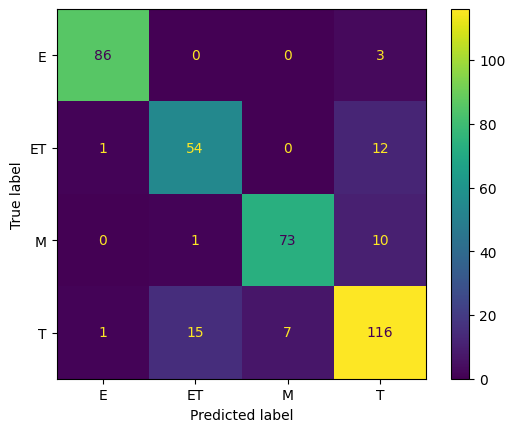

In [ ]:
# Best model
clf = LogisticRegression(**grid_search.best_params_)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred)

# Compute Confussion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

print(classification_report(y_test, y_pred))

In [ ]:
log_reg_acc

0.8680738786279684

In [ ]:
# Build a Support Vector Machines model
from sklearn import svm

param_grid = {'C': c_params, 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [0.1, 0.25, 0.5, 0.75, 0.9]
              }

clf = svm.SVC()

grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 2.0, 'gamma': 0.9, 'kernel': 'rbf'}
Best cross-validation score:  0.8621427326594633


              precision    recall  f1-score   support

           E       0.99      0.96      0.97        89
          ET       0.81      0.84      0.82        67
           M       0.92      0.92      0.92        84
           T       0.86      0.87      0.87       139

    accuracy                           0.89       379
   macro avg       0.90      0.89      0.89       379
weighted avg       0.90      0.89      0.89       379



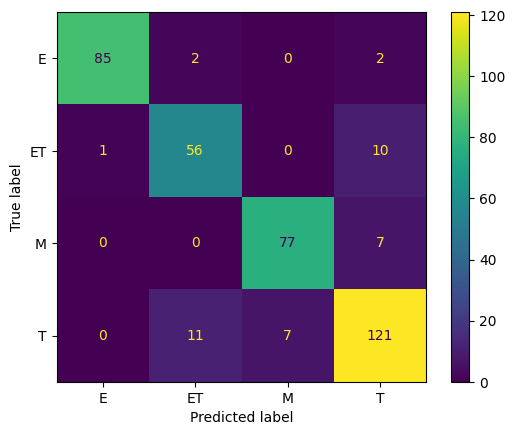

In [ ]:
# Best model
clf = svm.SVC(**grid_search.best_params_)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)

# Compute Confussion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

print(classification_report(y_test, y_pred))

In [ ]:
svm_acc

0.8944591029023746

In [ ]:
# Build a k-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
              'p': [1, 2]
              }

clf = KNeighborsClassifier()

grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 1, 'p': 2}
Best cross-validation score:  0.8397525270128965


              precision    recall  f1-score   support

           E       0.97      0.96      0.96        89
          ET       0.75      0.87      0.81        67
           M       0.95      0.82      0.88        84
           T       0.84      0.85      0.84       139

    accuracy                           0.87       379
   macro avg       0.88      0.87      0.87       379
weighted avg       0.88      0.87      0.87       379



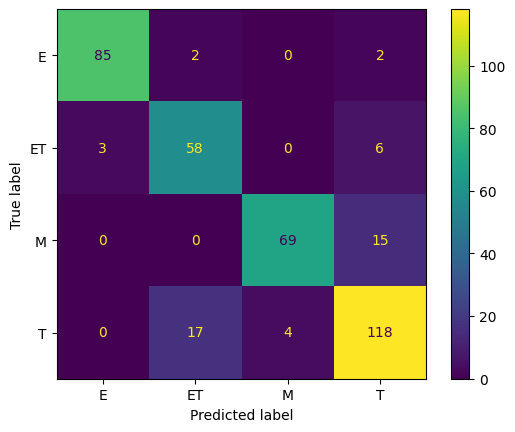

In [ ]:
# Best model
clf = KNeighborsClassifier(**grid_search.best_params_)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)

# Compute Confussion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

print(classification_report(y_test, y_pred))

In [ ]:
knn_acc

0.8707124010554089

In [ ]:
# Build a Decision Tree model
from sklearn.tree import DecisionTreeClassifier

d_f_params = []
for d in np.arange(1, 34):
  d_f_params.append(d)

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': d_f_params,
              'max_features': d_f_params
              }

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 33, 'max_features': 7}
Best cross-validation score:  0.8496122342279537


              precision    recall  f1-score   support

           E       0.97      0.96      0.96        89
          ET       0.71      0.82      0.76        67
           M       0.88      0.93      0.90        84
           T       0.87      0.78      0.83       139

    accuracy                           0.86       379
   macro avg       0.86      0.87      0.86       379
weighted avg       0.87      0.86      0.86       379



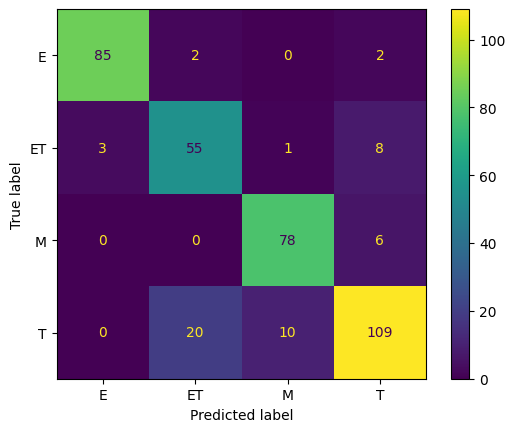

In [ ]:
# Best model
clf = DecisionTreeClassifier(**grid_search.best_params_)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
desc_tree_acc = accuracy_score(y_test, y_pred)

# Compute Confussion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

print(classification_report(y_test, y_pred))

In [ ]:
desc_tree_acc

0.862796833773087

In [ ]:
# Build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

d_f_params = []
for d in np.arange(1, 34, 3):
  d_f_params.append(d)

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': d_f_params,
              'max_features': d_f_params,
              'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10]
              }

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 25, 'max_features': 1, 'n_estimators': 10}
Best cross-validation score:  0.8595024398745208


              precision    recall  f1-score   support

           E       0.97      0.96      0.96        89
          ET       0.77      0.81      0.79        67
           M       0.89      0.93      0.91        84
           T       0.87      0.83      0.85       139

    accuracy                           0.88       379
   macro avg       0.87      0.88      0.88       379
weighted avg       0.88      0.88      0.88       379



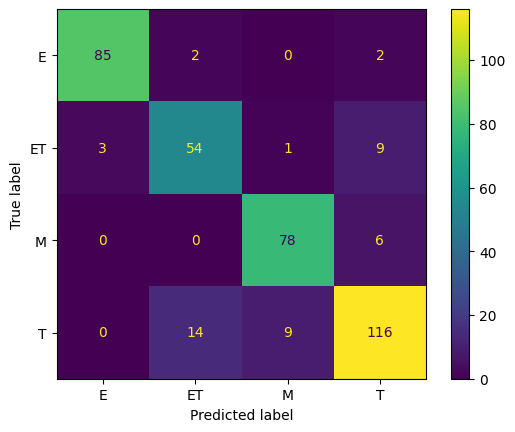

In [ ]:
# Best model
clf = RandomForestClassifier(**grid_search.best_params_)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rand_forest_acc = accuracy_score(y_test, y_pred)

# Compute Confussion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

print(classification_report(y_test, y_pred))

In [ ]:
rand_forest_acc

0.8786279683377308

              precision    recall  f1-score   support

           E       0.92      0.99      0.95        89
          ET       0.50      0.45      0.47        67
           M       0.42      0.98      0.58        84
           T       0.92      0.17      0.29       139

    accuracy                           0.59       379
   macro avg       0.69      0.65      0.57       379
weighted avg       0.73      0.59      0.54       379



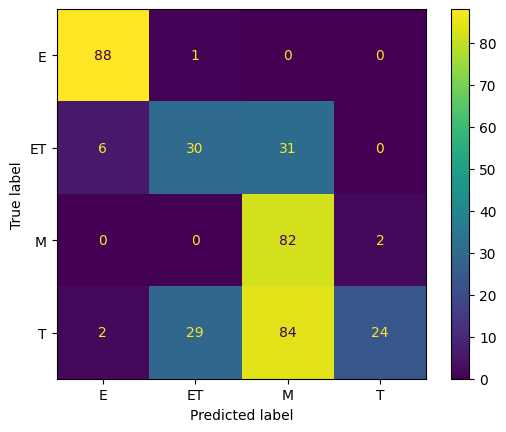

In [ ]:
# Build a Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred)

# Compute Confussion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

print(classification_report(y_test, y_pred))

In [ ]:
gnb_acc

0.5910290237467019

In [ ]:
# With tuned hyper parameters
# Create a Pandas DataFrame to compare the accuracy of the models
best_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN', 
              'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes'],
    'Score': [log_reg_acc, svm_acc, knn_acc, desc_tree_acc, 
              rand_forest_acc, gnb_acc]
})

# Sort by Score values in descending order
best_df.sort_values(by=['Score'], ascending=False)

,Model,Score
1,Support Vector Machines,0.894459
4,Random Forest,0.878628
2,KNN,0.870712
0,Logistic Regression,0.868074
3,Decision Tree,0.862797
5,Gaussian Naive Bayes,0.591029


In [ ]:
# No hyperparameters
# Build the models & compute their accuracy score
models = {'Logistic Regression': LogisticRegression(),
          'Support Vector Machines': svm.SVC(),
          'k-Nearest Neighbors (KNN)': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Gaussian Naive Bayes': GaussianNB(),
          'Decision Tree': DecisionTreeClassifier()}

scores = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append((name, score))

In [ ]:
# No hyperparameters
# Creating a DataFrame with Model and Score columns and sorting by Score values in ascending order
df = pd.DataFrame(scores, columns=['Model', 'Score'])
df.sort_values(by='Score', ascending=False, inplace=True)
df

,Model,Score
1,Support Vector Machines,0.883905
3,Random Forest,0.883905
5,Decision Tree,0.875989
0,Logistic Regression,0.857520
2,k-Nearest Neighbors (KNN),0.857520
4,Gaussian Naive Bayes,0.591029
